In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef
import functions.data_wrangling as data

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

In [4]:
can_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CanESM5*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
can_ds_djf = data.seasonal_dataset(can_ds, season='djf')
can_ds_djf = can_ds_djf.mean('time')
can_djf_corr = xr.corr(can_ds_djf.divF, can_ds_djf.ubar, dim='ens_ax')
model_can = 'CanESM5'

cesm2_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM2*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
cesm2_ds_djf = data.seasonal_dataset(cesm2_ds, season='djf')
cesm2_ds_djf = cesm2_ds_djf.mean('time')
cesm2_djf_corr = xr.corr(cesm2_ds_djf.divF, cesm2_ds_djf.ubar, dim='ens_ax')
model_cesm2 = 'CESM2'

cnrm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CNRM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
cnrm_ds_djf = data.seasonal_dataset(cnrm_ds, season='djf')
cnrm_ds_djf = cnrm_ds_djf.mean('time')
cnrm_djf_corr = xr.corr(cnrm_ds_djf.divF, cnrm_ds_djf.ubar, dim='ens_ax')
model_cnrm='CNRM-CM6-1'

e3sm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/E3SMv1*.nc')
e3sm_ds_djf = data.seasonal_mean(e3sm_ds, season='djf')
e3sm_djf_corr = xr.corr(e3sm_ds_djf.divF, e3sm_ds_djf.ubar, dim='time')
model_e3sm = 'E3SMv1'

ecearth_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/EC-EARTH3*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
ecearth_ds_djf = data.seasonal_dataset(ecearth_ds, season='djf')
ecearth_ds_djf = ecearth_ds_djf.mean('time')
ecearth_djf_corr = xr.corr(ecearth_ds_djf.divF, ecearth_ds_djf.ubar, dim='ens_ax')
model_ecearth = 'EC-EARTH3'

# skip AWI

fgoals_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/FGOALS-f3-L*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
fgoals_ds_djf = data.seasonal_dataset(fgoals_ds, season='djf')
fgoals_ds_djf = fgoals_ds_djf.mean('time')
fgoals_djf_corr = xr.corr(fgoals_ds_djf.divF, fgoals_ds_djf.ubar, dim='ens_ax')
model_fgoals = 'FGOALS-f3-L'

hadll_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/HadGEM3-GC31-LL*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
hadll_ds_djf = data.seasonal_dataset(hadll_ds, season='djf')
hadll_ds_djf = hadll_ds_djf.mean('time')
hadll_djf_corr = xr.corr(hadll_ds_djf.divF, hadll_ds_djf.ubar, dim='ens_ax')
model_hadll = 'HadGEM3-GC31-LL'


hadmm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/HadGEM3-GC31-MM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
hadmm_ds_djf = data.seasonal_dataset(hadmm_ds, season='djf')
hadmm_ds_djf = hadmm_ds_djf.mean('time')
hadmm_djf_corr = xr.corr(hadmm_ds_djf.divF, hadmm_ds_djf.ubar, dim='ens_ax')
model_hadmm = 'HadGEM3-GC31-MM'

ipsl_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/IPSL-CM6A-LR*.nc',
                            parallel=True, chunks={'time':12, 'ens_ax':50})
ipsl_ds_djf = data.seasonal_dataset(ipsl_ds, season='djf')
ipsl_ds_djf = ipsl_ds_djf.mean('time')
ipsl_djf_corr = xr.corr(ipsl_ds_djf.divF, ipsl_ds_djf.ubar, dim='ens_ax')
model_ipsl = 'IPSL-CM6A-LR'

miroc_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/MIROC6*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
miroc_ds_djf = data.seasonal_dataset(miroc_ds, season='djf')
miroc_ds_djf = miroc_ds_djf.mean('time')
miroc_djf_corr = xr.corr(miroc_ds_djf.divF, miroc_ds_djf.ubar, dim='ens_ax')
model_miroc = 'MIROC6'

nor_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/NorESM2-LM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
nor_ds_djf = data.seasonal_dataset(nor_ds, season='djf')
nor_ds_djf = nor_ds_djf.mean('time')
nor_djf_corr = xr.corr(nor_ds_djf.divF, nor_ds_djf.ubar, dim='ens_ax')
model_nor = 'NorESM2-LM'

t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-159*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
t159_ds_djf = data.seasonal_dataset(t159_ds, season='djf')
t159_ds_djf = t159_ds_djf.mean('time')
t159_djf_corr = xr.corr(t159_ds_djf.divF, t159_ds_djf.ubar, dim='ens_ax')
model_t159 = 'OpenIFS-159'

t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-511*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
t511_ds_djf = data.seasonal_dataset(t511_ds, season='djf')
t511_ds_djf = t511_ds_djf.mean('time')
t511_djf_corr = xr.corr(t511_ds_djf.divF, t511_ds_djf.ubar, dim='ens_ax')
model_t511 = 'OpenIFS-511'

cesm1_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1*.nc')
cesm1_ds_djf = data.seasonal_mean(cesm1_ds, season='djf')
cesm1_djf_corr = xr.corr(cesm1_ds_djf.divF, cesm1_ds_djf.ubar, dim='time')
model_cesm1 = 'CESM1-WACCM-SC'

In [8]:
mean = (can_djf_corr + cesm2_djf_corr + cnrm_djf_corr + e3sm_djf_corr + ecearth_djf_corr + \
        fgoals_djf_corr + hadll_djf_corr + hadmm_djf_corr + ipsl_djf_corr + miroc_djf_corr + \
        nor_djf_corr + t159_djf_corr + t511_djf_corr + cesm1_djf_corr) / 14
mean

<xarray.DataArray (level: 8, lat: 61)>
dask.array<truediv, shape=(8, 61), dtype=float64, chunksize=(8, 61), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float64 1e+03 850.0 700.0 500.0 250.0 100.0 50.0 10.0
  * lat      (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
    lon      float64 0.0

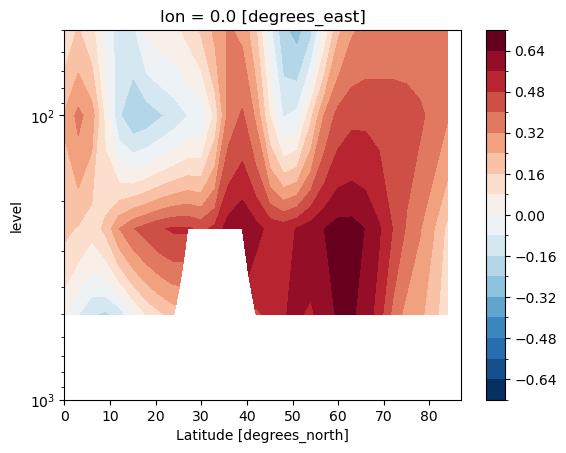

In [9]:
mean = mean.sel(lat=slice(0,87))
mean = mean.where( mean.level > 10., drop=True)

mean.plot.contourf(levels=20, yincrease=False, yscale='log')